<a href="https://colab.research.google.com/github/JoaoVBorges-web/Faculdade/blob/main/Filtros_Vizinhanca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plot
import math

from google.colab.patches import cv2_imshow

PATH = "/content/drive/My Drive"

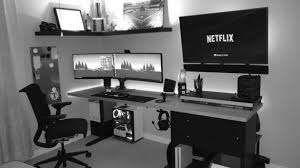

In [ ]:
imgEntrada = cv.imread(PATH+'/setup.jpg', cv.IMREAD_GRAYSCALE)

cv2_imshow( imgEntrada )

In [ ]:
def filtroMaximo(imgEntrada, numLinhasViz=3, numColunasViz=3):
    quantLinhas = np.size(imgEntrada, 0)
    quantColunas = np.size(imgEntrada, 1)
    
    imgSaida = np.zeros( (quantLinhas, quantColunas), dtype='uint8')
    quantVizColuna = math.ceil(numColunasViz/2)
    quantVizLinha = math.ceil(numLinhasViz/2)
    
    for linha in range(quantLinhas):
        for coluna in range(quantColunas):
            valorMaior = imgEntrada[linha, coluna]
            for deslocamentoLinha in range(-quantVizLinha, quantVizLinha):
                for deslocamentoCol in range(-quantVizColuna, quantVizColuna):
                    pixelLinha = linha + deslocamentoLinha
                    pixelColuna = coluna + deslocamentoCol
                    if(pixelLinha >= 0 and pixelLinha < quantLinhas and pixelColuna >= 0 and pixelColuna < quantColunas):
                        if (valorMaior < imgEntrada[pixelLinha, pixelColuna]):
                            valorMaior = imgEntrada[pixelLinha, pixelColuna]

            imgSaida[linha, coluna] = valorMaior

    return imgSaida


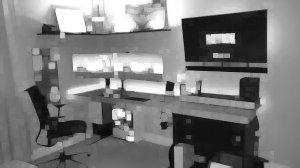

In [ ]:
imgSaida = filtroMaximo(imgEntrada, 3,3)
cv2_imshow( imgSaida )

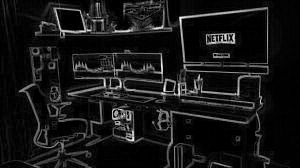

In [ ]:
#Estou supondo que você já carregou a imagem de entrada: imgEntrada

# passo 1: Crie uma variável, chamada imgSaida, para armazenar a imagem do gradiente utilizando as mesmas dimensões da imagem de entrada;
quantLinhas = np.size(imgEntrada, 0)
quantColunas = np.size(imgEntrada, 1)
    
imgSaida = np.zeros( (quantLinhas, quantColunas), dtype='uint8')

#passo 2: Determine em duas variáveis as dimensões da janela do filtro;
numLinhasViz = 3
numColunasViz = 3

#passo 3: Crie uma variável, chamada imgMaximo, para armazenar o resultado da aplicação do filtro do máximo utilizando a janela com as dimensões definidas no passo 2;
imgMaximo = filtroMaximo(imgEntrada, numLinhasViz, numColunasViz)

#passo 4: é com você

for linha in range(quantLinhas):
  
     for coluna in range(quantColunas):
       imgSaida[linha, coluna] = imgMaximo[linha, coluna] - imgEntrada[linha, coluna]


cv2_imshow( imgSaida )